In [419]:
%matplotlib inline
main_path = '/Users/christian/Dropbox/McGill-publication/Papers/Multisite/'

In [420]:
from matplotlib.pylab import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.gridspec as gridspec

def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None, label=''):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color, label=label, lw=2)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    
def load_file(path):
    mat = scipy.io.loadmat(path)
    return mat

def gen_fig(path_in, file_in,path_out, file_out, conn = 0, pvalidx=0):
    labels_box = ['H0 multi','H0 Dummy', 'H0 METAL']
    lw = 2
    mat = load_file(path_in + file_in)
    pvals = mat.get('list_p')[0]
    fig = plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    #ax.set_xticks(np.arange(0,1,0.1))
    #ax.set_yticks(np.arange(0,1.,0.1))
    plt.xlim(0,1.5)
    effect_size = np.arange(0.0, 1.501, 0.01)
    plt.ylabel('Detection power')
    plt.xlabel('Effect size (cohen\'s d)')
    plt.plot(effect_size, mat.get('sens_monosite')[pvalidx,:,conn],label="Monosite", lw=lw, c='r')
    #plt.plot(effect_size, mat.get('sens_multisite_nocorr')[pvalidx,:,conn],label="Multisite no correction",lw=lw, c='k')
    plt.plot(effect_size, mat.get('sens_multisite_dummyvar')[pvalidx,:,conn],label="Multisite Dummy",lw=lw, c='b')
    #plt.plot(effect_size, mat.get('sens_multisite_metal')[pvalidx,:,conn],label="Multisite METAL",lw=lw, c='m')
    plt.grid(True)
    plt.title('p-value ' +  str(pvals[pvalidx]))
    
    # fully use the given bounding box.
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=4, mode="expand", borderaxespad=0.)
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    # do the box plot
    plt.subplot(2, 2, 4)
    ax = fig.gca()
    #xtickNames = plt.setp(ax, xticklabels=np.repeat(labels_box, 1))
    #plt.setp(xtickNames, rotation=45, fontsize=12)
    plt.xlabel('Effect size (cohen\'s d)')
    #h0_metal =  mat.get('sens_multisite_h0_metal')[pvalidx,:,conn]
    #h0_multi  = mat.get('sens_multisite_h0')[pvalidx,:,conn]
    h0_dummy  = np.mean(mat.get('sens_multisite_h0_dummy')[pvalidx,:,conn],axis=0)
    #boxplot((h0_multi,h0_dummy,h0_metal))
    boxplot((h0_dummy))
    ax.set_xticklabels(labels_box, rotation=0, ha='center')
    ax.set_yscale('log')
    ax.set_ylim((10**(-3),10**(0)))
    plt.ylabel('Detection power (log)')
    plt.title('H0 hypotheses')
    plt.tight_layout()
    #plt.savefig(path_out + file_out)
    #plt.show()

def gen_fig_allconn(path_in, file_in, path_out, file_out, conn = 0, pvalidx=0):
    labels_box = ['H0 multi','H0 Dummy', 'H0 METAL']
    lw = 2
    mat = load_file(path_in + file_in)
    pvals = mat.get('list_p')[0]
    
    fig = plt.figure(figsize=(5,5))
    plt.subplot2grid((5,2), (1,0),colspan=2,rowspan=4)
    ax = fig.gca()
    #ax.set_xticks(np.arange(0,1,0.1))
    #ax.set_yticks(np.arange(0,1.,0.1))
    plt.xlim(0,1.5)
    effect_size = np.arange(0.0, 1.501, 0.01)
    plt.ylabel('Detection power')
    plt.xlabel('Effect size (cohen\'s d)')
    ax.set_ylim((0,1))
    tmpdata = mat.get('sens_monosite')[pvalidx,:,:]
    errorfill(effect_size, tmpdata.mean(axis=1),tmpdata.std(axis=1),label="Monosite", color='r')
    #tmpdata = mat.get('sens_multisite_nocorr')[pvalidx,:,:]
    #errorfill(effect_size, tmpdata.mean(axis=1),tmpdata.std(axis=1),label="Multisite no correction", color='k')
    tmpdata = mat.get('sens_multisite_dummyvar')[pvalidx,:,:]
    errorfill(effect_size, tmpdata.mean(axis=1),tmpdata.std(axis=1),label="Multisite Dummy", color='b')
    #tmpdata = mat.get('sens_multisite_metal')[pvalidx,:,:]
    #errorfill(effect_size, tmpdata.mean(axis=1),tmpdata.std(axis=1),label="Multisite METAL", color='m')
    
    plt.grid(True)
    plt.title('p-value ' +  str(pvals[pvalidx]))
    
    # fully use the given bounding box.
    plt.legend(bbox_to_anchor=(0., 1.10, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.,frameon=False)
    #plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    # do the box plot
    #plt.subplot2grid((7,2), (5,0),colspan=2,rowspan=2)
    #ax = fig.gca()
    ##xtickNames = plt.setp(ax, xticklabels=np.repeat(labels_box, 1))
    ##plt.setp(xtickNames, rotation=45, fontsize=12)
    #plt.xlabel('Effect size (cohen\'s d)')
    #h0_metal =  np.ndarray.flatten(np.mean(mat.get('sens_multisite_h0_metal')[pvalidx,:,:],axis=0))
    #h0_multi  = np.ndarray.flatten(np.mean(mat.get('sens_multisite_h0')[pvalidx,:,:],axis=0))
    #h0_dummy  = np.ndarray.flatten(np.mean(mat.get('sens_multisite_h0_dummy')[pvalidx,:,:],axis=0))
    ##boxplot((h0_multi,h0_dummy,h0_metal))
    #boxplot((h0_dummy))
    #ax.set_xticklabels(labels_box, rotation=0, ha='center')
    #ax.set_yscale('log')
    #ax.set_ylim((10**(-5),10**(0)))
    #plt.ylabel('Detection power (log)')
    #plt.title('H0 hypotheses')
    #plt.grid(True)
    plt.tight_layout()
    plt.savefig(path_out + file_out)
    

def gen_fig_full_sim(path_in, file_in,path_out, file_out):
    labels_box = ['H0 multi','H0 Dummy', 'H0 METAL']
    lw = 2
    mat = load_file(path_in + file_in)
    pvals = 0.001
    #fig = plt.figure(figsize=(5.5,7))
    fig = plt.figure(figsize=(5,5))
    plt.subplot2grid((5,2), (1,0),colspan=2,rowspan=4)
    ax = fig.gca()
    plt.xlim(0,1.5)
    effect_size = np.arange(0.0, 1.501, 0.01)
    ax.set_ylim((0,1))
    plt.ylabel('Detection power')
    plt.xlabel('Effect size (cohen\'s d)')
    plt.plot(effect_size, mat.get('sens_mono'),label="Monosite",lw=lw, color='r')
    #plt.plot(effect_size, mat.get('sens_multi'),label="Multisite no correction",lw=lw, c='k')
    plt.plot(effect_size, mat.get('sens_multi_dummy'),label="Multisite Dummy",lw=lw, c='b')
    #plt.plot(effect_size, mat.get('sens_multi_metal'),label="Multisite METAL",lw=lw, c='m')
    plt.grid(True)
    plt.title('p-value ' +  str(pvals))
    
    # fully use the given bounding box.
    plt.legend(bbox_to_anchor=(0., 1.10, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.,frameon=False)
    ##plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    ## do the box plot
    #plt.subplot2grid((7,2), (5,0),colspan=2,rowspan=2)
    #ax = plt.gca()
    ##ax = fig.gca()
    ##xtickNames = plt.setp(ax, xticklabels=np.repeat(labels_box, 1))
    ##plt.setp(xtickNames, rotation=45, fontsize=12)
    #plt.xlabel('Effect size (cohen\'s d)')
    ##h0_metal =  np.mean(mat.get('sens_multi_h0_metal'),axis=0)
    ##h0_multi  = np.mean(mat.get('sens_multi_h0'),axis=0)
    ##h0_dummy  = np.mean(mat.get('sens_multi_h0_dummy'),axis=0)
    ##boxplot((h0_multi,h0_dummy,h0_metal))
    #boxplot((h0_dummy))
    #ax.set_xticklabels(labels_box, rotation=0, ha='center')
    #ax.set_yscale('log')
    #ax.set_ylim((10**(-5),10**(0)))
    #plt.ylabel('Detection power (log)')
    #plt.title('H0 hypotheses')
    #plt.grid(True)
    plt.tight_layout()
    plt.savefig(path_out + file_out)
    ##plt.show()
    
    

((50,), (50,))
[[1 2]
 [3 4]]
[1 2 3 4]


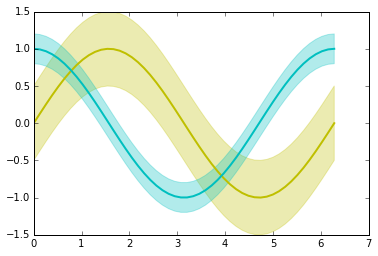

In [421]:

x = np.linspace(0, 2 * np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)
print(x.shape,y_cos.shape)
errorfill(x, y_sin, 0.5,'y')
errorfill(x, y_cos, 0.2,'c')

a = np.array([[1,2], [3,4]])
print a
print np.ndarray.flatten(a)


# Figures for the real data

- 7 sites of ~20 subjects each, (real data)
- Balancing of pathology per site is 50%
- For each figure we vary the sample size from 40, 80 and 120 subjects

conn = 0
path_tmp = main_path + 'figures/samps_s40_50pct/'
for conn in range(9, 10):
    gen_fig(path_tmp,'results_simu_power.mat',path_tmp, 'detection_power.pdf',conn)

path_tmp = main_path + 'figures/samps_s80_50pct/'
for conn in range(9, 10):
    gen_fig(path_tmp,'results_simu_power.mat',path_tmp, 'detection_power.pdf',conn)

path_tmp = main_path + 'figures/samps_s120_50pct/'
for conn in range(9, 10):
    gen_fig(path_tmp,'results_simu_power.mat',path_tmp, 'detection_power.pdf',conn)


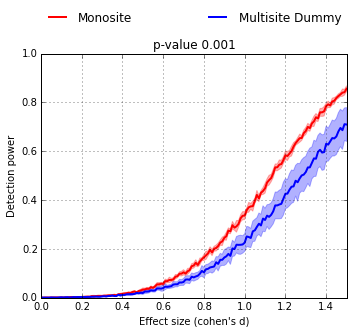

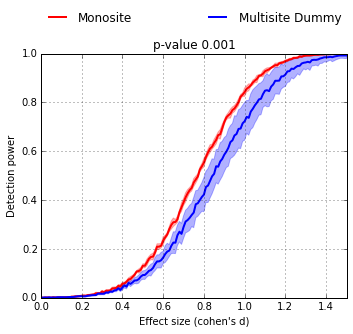

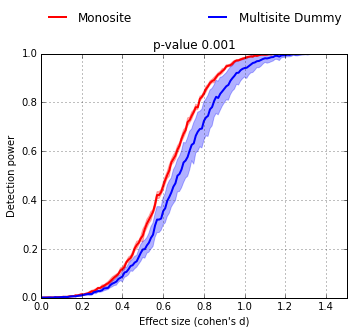

In [422]:

path_out = main_path + 'figures/'
path_tmp = main_path + 'figures/samps_s40_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s40_50pct.pdf')

path_tmp = main_path + 'figures/samps_s80_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_50pct.pdf')

path_tmp = main_path + 'figures/samps_s120_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_50pct.pdf')


## Figures for the real data

- 7 sites of ~20 subjects each, (real data)
- Balancing of pathology per site is:
    - Figure 1: 15% and 85%
    - Figure 2: 30% and 70%
    - Figure 3: 50% and 50%

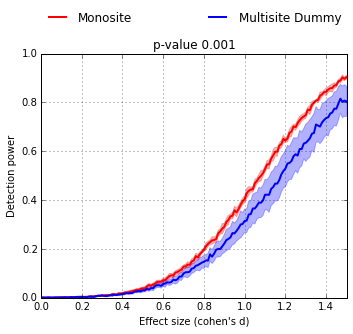

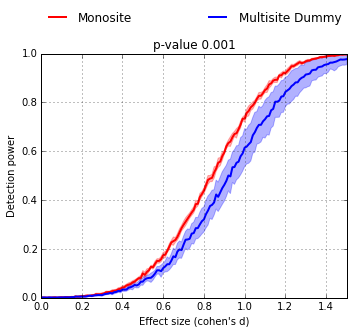

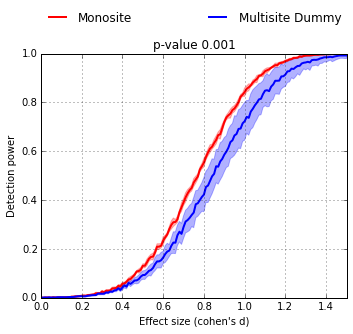

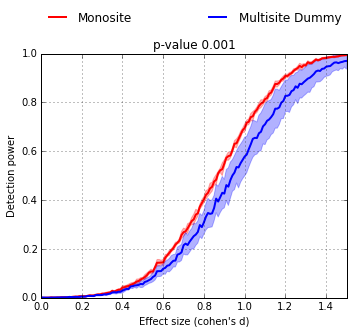

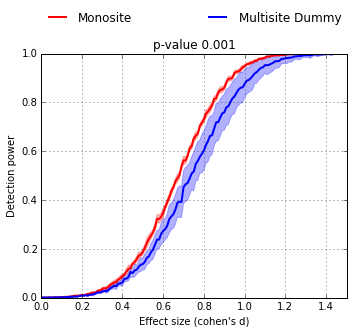

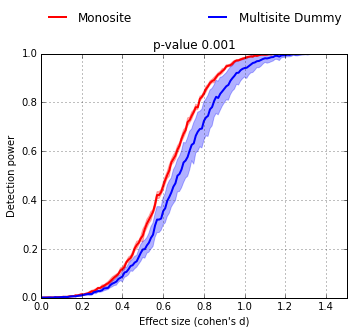

In [423]:

path_tmp = main_path + 'figures/samps_s80_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_15pct.pdf')
    
path_tmp = main_path + 'figures/samps_s80_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_30pct.pdf')
    
path_tmp = main_path + 'figures/samps_s80_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_50pct.pdf')


path_tmp = main_path + 'figures/samps_s120_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_15pct.pdf')
    
path_tmp = main_path + 'figures/samps_s120_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_30pct.pdf')
    
path_tmp = main_path + 'figures/samps_s120_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_50pct.pdf')



# Figures for the real data with site effect in patho

- 7 sites of ~20 subjects each for a total of 120 subjects, (real data)
- Effect of the site in relationship with the pathology (2x the effect on site 1 and 1/2 the effect on site 2)
- Balancing of pathology per site is:
    - Figure 1: 15% and 85%
    - Figure 2: 30% and 70%
    - Figure 3: 50% and 50%

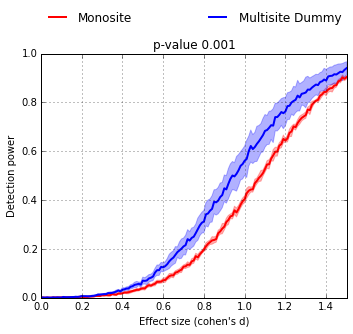

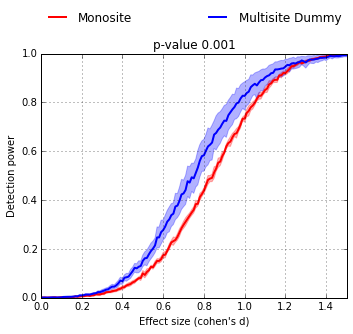

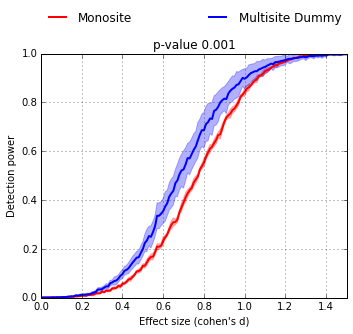

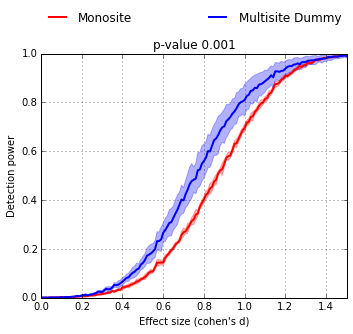

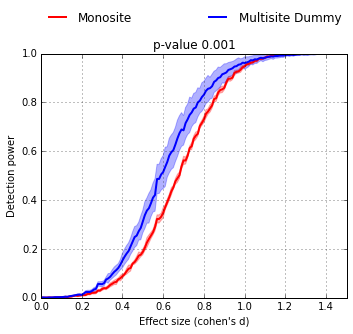

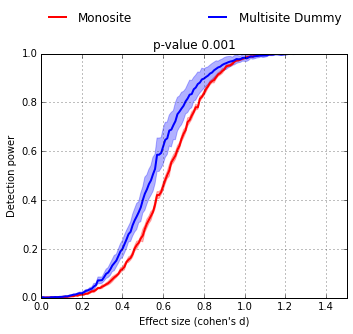

In [424]:
path_tmp = main_path + 'figures/sim_site_patho/samps_s80_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s80_15pct.pdf')
path_tmp = main_path + 'figures/sim_site_patho/samps_s80_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s80_30pct.pdf')
path_tmp = main_path + 'figures/sim_site_patho/samps_s80_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s80_50pct.pdf')

path_tmp = main_path + 'figures/sim_site_patho/samps_s120_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s120_15pct.pdf')
path_tmp = main_path + 'figures/sim_site_patho/samps_s120_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s120_30pct.pdf')
path_tmp = main_path + 'figures/sim_site_patho/samps_s120_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s120_50pct.pdf')

## Real data simulation 2 sites unbalanced

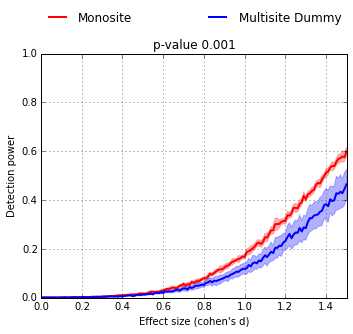

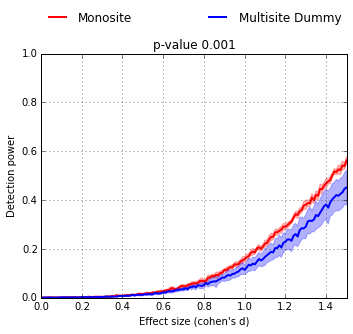

In [425]:
path_tmp = main_path + 'figures/2sites_realdata/samps_s33_70_30_2site/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho2site_s33_70pct.pdf')
path_tmp = main_path + 'figures/2sites_realdata/samps_s33_30_70_2site/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho2site_s33_30pct.pdf')

# Figures for full simulations

## Balanced sites 50/50

- 2 sites of 50 subjects each,
- Balancing of pathology per site is 50% and 50%

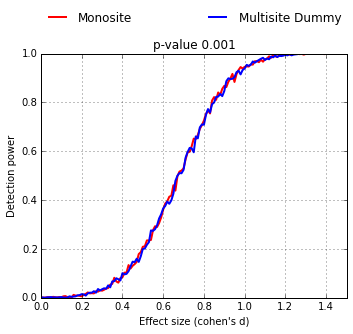

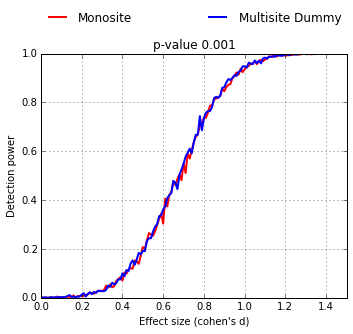

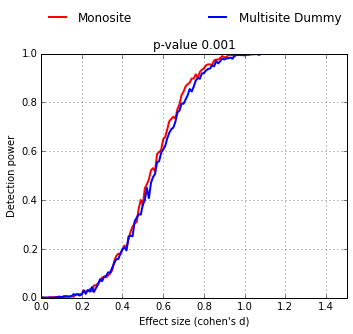

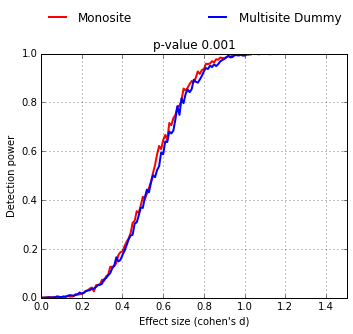

In [426]:
path_tmp = main_path + 'figures/'

gen_fig_full_sim(path_tmp,'simulationssimu_bal5050_var0_site0.mat',path_tmp, 'detect_pow_bal5050_var0_site0.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_bal5050_var0_site05.mat',path_tmp, 'detect_pow_bal5050_var0_site05.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_bal5050_var2_site0.mat',path_tmp, 'detect_pow_bal5050_var2_site0.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_bal5050_var2_site05.mat',path_tmp, 'detect_pow_bal5050_var2_site05.pdf')

## Unbalanced site 70/30

- 2 sites of 50 subjects each,
- Balancing of pathology per site is 70% and 30%

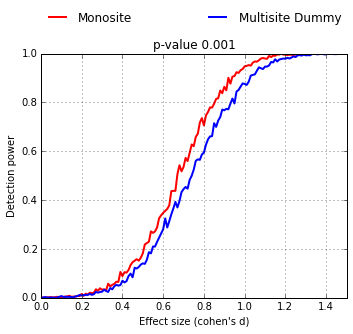

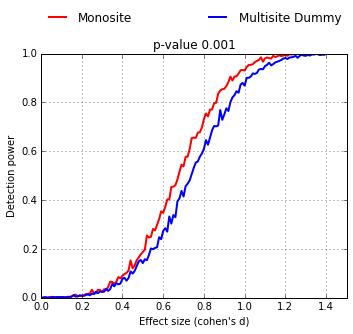

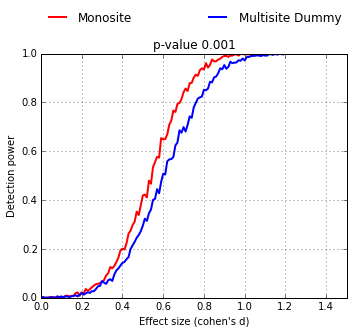

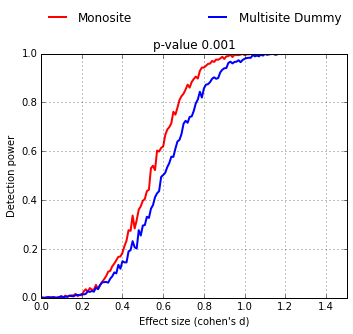

In [427]:
path_tmp = main_path + 'figures/'
gen_fig_full_sim(path_tmp,'simulationssimu_bal7030_var0_site0.mat',path_tmp, 'detect_pow_bal7030_var0_site0.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_bal7030_var0_site05.mat',path_tmp, 'detect_pow_bal7030_var0_site05.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_bal7030_var2_site0.mat',path_tmp, 'detect_pow_bal7030_var2_site0.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_bal7030_var2_site05.mat',path_tmp, 'detect_pow_bal7030_var2_site05.pdf')

## Unbalanced and sample size difference

- 2 sites of 20 subjects and 80 subjects,
- Balancing of pathology per site is 50% and 50%
- Effect of the site in relationship with the pathology (2x the effect on site 1 and 1/2 the effect on site 2)

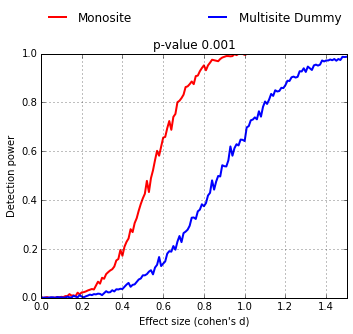

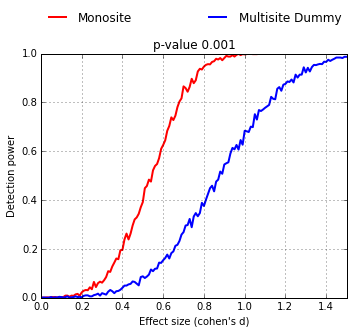

In [428]:
path_tmp = main_path + 'figures/'
gen_fig_full_sim(path_tmp,'simulationssimu_2080bal5050_var2_site0.mat',path_tmp, 'detect_pow_2080bal5050_var2_site0.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_2080bal5050_var2_site05.mat',path_tmp, 'detect_pow_2080bal5050_var2_site05.pdf')


- 2 sites of 20 subjects and 80 subjects,
- Balancing of pathology per site is 70% and 30%
- Effect of the site in relationship with the pathology (2x the effect on site 1 and 1/2 the effect on site 2)

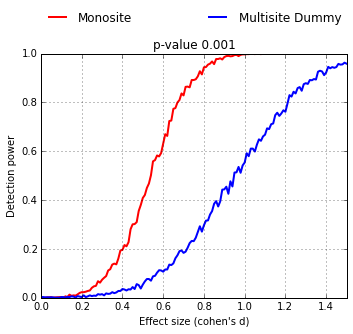

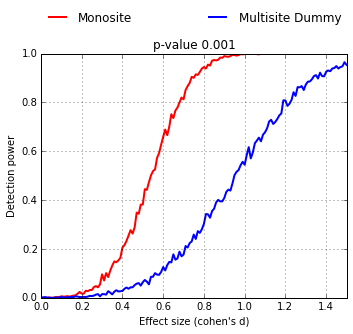

In [429]:
path_tmp = main_path + 'figures/'

gen_fig_full_sim(path_tmp,'simulationssimu_2080bal7030_var2_site0.mat',path_tmp, 'detect_pow_2080bal7030_var2_site0.pdf')
gen_fig_full_sim(path_tmp,'simulationssimu_2080bal7030_var2_site05.mat',path_tmp, 'detect_pow_2080bal7030_var2_site05.pdf')


In [430]:
aa = load_file(path_tmp + 'simulationssimu_2080bal5050_var2_site0.mat')

In [431]:
aa.keys()

['opt',
 'sens_multi_h0_metal',
 'sens_multi',
 'sens_multi_h0',
 'sens_multi_dummy',
 '__header__',
 '__globals__',
 'sens_multi_h0_dummy',
 'sens_multi_metal',
 '__version__',
 'sens_mono']

In [432]:
#aa.get('sens_multi_nocorr')

print main_path


/Users/christian/Dropbox/McGill-publication/Papers/Multisite/
